<a href="https://colab.research.google.com/github/vilcagamarracf/Python_Snippets/blob/main/vizcachas_graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos de la estación Vizcachas

## Inicio

1. Conectar con drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


2. Revisar archivos en drive

In [1]:
%cd drive/MyDrive/Richard_vizcachas/

/content/drive/MyDrive/Richard_vizcachas


In [2]:
%ls

datos_csv/   imagenes_procesado/           Temperatura_anual.png
documentos/  Serie_de_tiempo_Modelo.ipynb  vizcachas_graficos.ipynb


In [3]:
%ls datos_csv

Pisco_pp.csv            Pisco_Tmax.csv    Pisco_Tmin.csv
Pisco_Temperaturas.csv  Pisco_Tmedia.csv  Temperatura_Vizcachas.csv


3. Cargar datos

In [34]:
# Parámetros para visualización
import pandas as pd
import matplotlib.pyplot as plt

# Estableciendo tamaño de visualizaciones
plt.rcParams['figure.figsize'] = [15,6]

## Estación VIZCACHAS VW-1: Datos de estación convencional

In [5]:
# @markdown Función: `ver_grafica(df=None)`

def ver_grafica(
    df=None, title=None, xlabel=None, ylabel=None, 
    columna=None
    ):
  
  # Para obtener una medida en cm:
  # cm = 1/2.54 # convertir a cm
  # plt.figure(1, figsize=(16.2*cm, 8.5*cm)) # modificar las medidas

  # Visualización
  if columna == 'Tmax':
    plt.plot(df.FECHA, df.Tmax, 'r.-', label = 'Tmax')
  elif columna == 'Tmin':
    plt.plot(df.FECHA, df.Tmin, 'b.-', label = 'Tmin')
    plt.axhline(0, color = 'black', linewidth = '1') # Resaltar el 0
  else:
    plt.plot(df.FECHA, df.Tmax, 'r-', label = 'Tmax')
    plt.plot(df.FECHA, df.Tmedia, 'k-', label = 'Tmedia')
    plt.plot(df.FECHA, df.Tmin, 'b-', label = 'Tmin')

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  # Establecer eje X con años de acuerdo al df
  plt.xticks(
      [pd.Timestamp(str(i)) for i in range(
          df.FECHA[0].year,
          df.FECHA[df.shape[0]-1].year+1
          )
      ], rotation=60
    )
  
  # Darle formato a las fechas
  from matplotlib import dates as mpl_dates
  date_format = mpl_dates.DateFormatter('%Y')
  plt.gca().xaxis.set_major_formatter(date_format) 

  # Ubicar la leyenda en la parte inferior
  plt.legend()
  plt.gca().legend(loc='lower center', 
                   bbox_to_anchor=(0.5, 0.001),
                   ncol=3)
  plt.grid();

In [70]:
# Parametros de visualización
estacion = 'Estación VIZCACHAS VW-1'
titulo = 'TENDENCIA DE TEMPERATURA MEDIA MENSUAL\nDATA PISCO VS EST. COVENCIONAL' # Modificable
ylabel = 'TEMPERATURA (°C)'
xlabel = 'FECHA' # Posible omitir en gráficas

##### Datos diarios

,FECHA,Tmax,Tmin,Tmedia
0,2003-01-01,10.0,-0.8,4.60
1,2003-01-02,12.0,-0.5,5.75
2,2003-01-03,12.2,-4.0,4.10
3,2003-01-04,14.2,-8.2,3.00
4,2003-01-05,15.0,-9.5,2.75
...,...,...,...,...
6751,2021-06-26,8.6,-12.1,-1.75
6752,2021-06-27,8.0,-11.3,-1.65
6753,2021-06-28,7.7,-10.6,-1.45
6754,2021-06-29,8.4,-18.1,-4.85


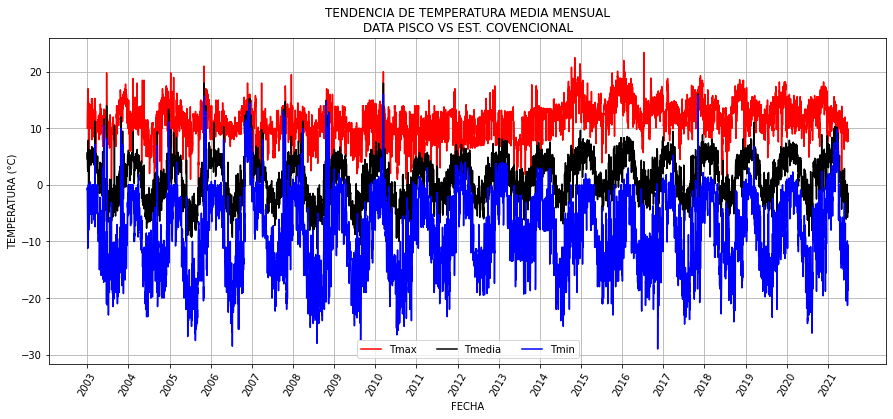

In [7]:
vizc_est = pd.read_csv('datos_csv/Temperatura_Vizcachas.csv')
vizc_est.FECHA = pd.to_datetime(vizc_est.FECHA, format='%d/%m/%Y')
vizc_est.columns = ['FECHA', 'Tmax', 'Tmin', 'Tmedia']
display(vizc_est)

# Visualización
ver_grafica(vizc_est, titulo, xlabel, ylabel)

##### Mensualizar datos 

,FECHA,Tmax,Tmin,Tmedia
0,2003-01-01,12.054839,-2.845161,4.604839
1,2003-02-01,12.017857,-2.382143,4.817857
2,2003-03-01,11.458065,-2.683871,4.387097
3,2003-04-01,11.006667,-6.963333,2.021667
4,2003-05-01,10.254839,-9.119355,0.567742


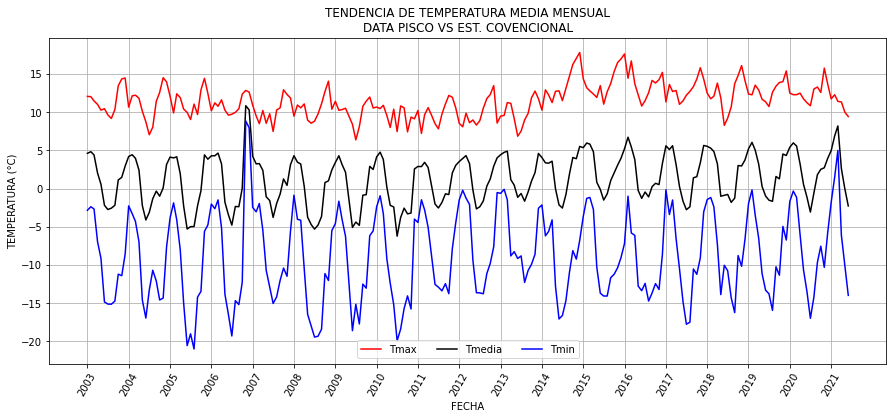

In [8]:
vizc_est_mensual = vizc_est.set_index('FECHA').resample(rule='MS').mean()
vizc_est_mensual = vizc_est_mensual.reset_index()
vizc_est_mensual.FECHA = pd.to_datetime(vizc_est_mensual.FECHA, format='%d/%m/%Y')
display(vizc_est_mensual.head())

ver_grafica(vizc_est_mensual, titulo, xlabel, ylabel)

La estación vizcachas presenta 6756 datos diarios desde 2003-01-01 hasta 2021-06-30 y 222 datos mensuales

##### Anualizar datos

,FECHA,Tmax,Tmin,Tmedia
0,2003-01-01,11.548219,-9.601648,1.000822
1,2004-01-01,11.083607,-10.095355,0.494126
2,2005-01-01,11.356164,-11.015068,0.170548
3,2006-01-01,10.956164,-7.245055,1.880548
4,2007-01-01,10.235890,-8.807671,0.714110


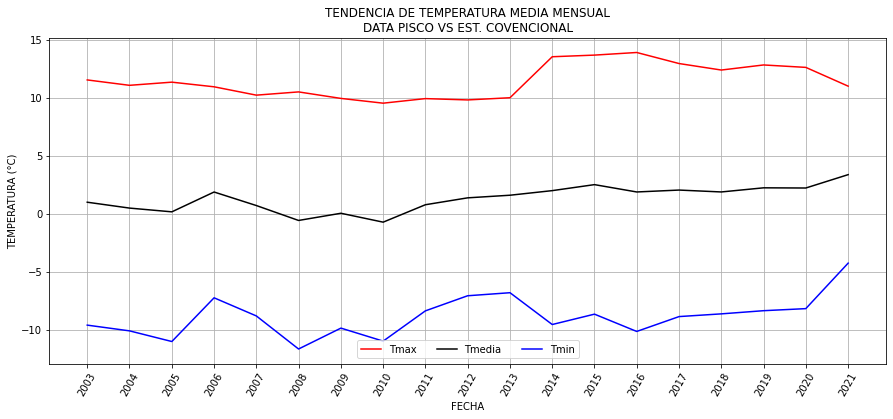

In [9]:
vizc_est_anual = vizc_est.set_index('FECHA').resample(rule='AS').mean()
vizc_est_anual = vizc_est_anual.reset_index()
vizc_est_anual.FECHA = pd.to_datetime(vizc_est_anual.FECHA, format='%d/%m/%Y')
display(vizc_est_anual.head())

ver_grafica(vizc_est_anual, titulo, xlabel, ylabel)

## Estación VIZCACHAS VW-1: Datos PISCO

,FECHA,Tmax,Tmin,Tmedia
0,1981-01-01,13.98,0.12,7.05
1,1981-02-01,13.54,0.87,7.20
2,1981-03-01,14.84,-0.99,6.92
3,1981-04-01,14.63,-5.11,4.76
4,1981-05-01,15.29,-10.97,2.16
...,...,...,...,...
427,2016-08-01,17.32,-12.28,2.52
428,2016-09-01,18.42,-10.24,4.09
429,2016-10-01,18.52,-7.83,5.35
430,2016-11-01,18.72,-8.29,5.21


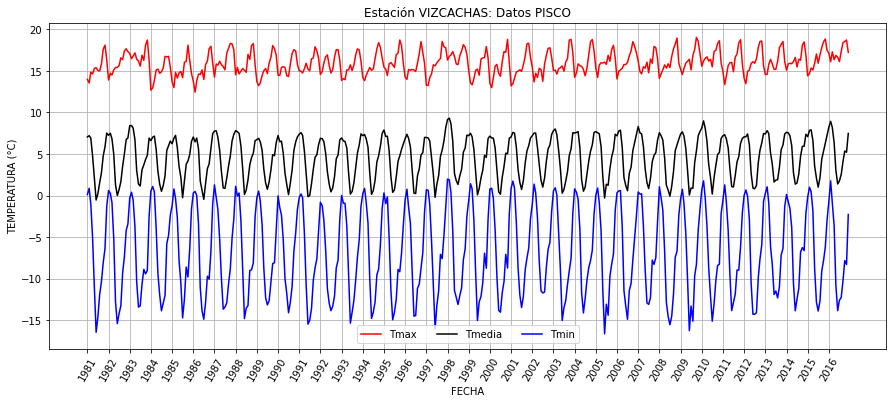

In [ ]:
vizc_pisco = pd.read_csv('datos_csv/Pisco_Temperaturas.csv', delimiter=';')
vizc_pisco.FECHA = pd.to_datetime(vizc_pisco.FECHA, format='%d/%m/%Y')
display(vizc_pisco)

# Visualización
ver_grafica(vizc_pisco, 'Estación VIZCACHAS: Datos PISCO', xlabel, ylabel)

## Pisco vs Est. Convencional

In [ ]:
# @markdown Función `ver_pisco_vs_estconv(columna=None)`
cm = 1/2.54
xticks = [pd.Timestamp(str(i)) for i in range(2000,2022,1)]

def ver_pisco_vs_estconv(columna=None):
  plt.figure(1, figsize=(16.2*cm, 8.5*cm))
  if columna == 'Tmax':
    plt.plot(vizc_est_mensual.FECHA, vizc_est_mensual.Tmax, 'r.-', label = 'Tmax_Est')
    plt.plot(vizc_pisco.FECHA, vizc_pisco.Tmax, 'b.-', label = 'Tmax_Pisco')
    title='MÁXIMA'
  elif columna == 'Tmin':
    plt.plot(vizc_est_mensual.FECHA, vizc_est_mensual.Tmin, 'r.-', label = 'Tmin_Est')
    plt.plot(vizc_pisco.FECHA, vizc_pisco.Tmin, 'b.-', label = 'Tmin_Pisco')
    plt.axhline(0, color = 'black', linewidth = '1') # Resaltar el 0
    title='MÍNIMA'
  else:
    plt.plot(vizc_est_mensual.FECHA, vizc_est_mensual.Tmedia, 'r.-', label = 'Tmedia_Est')
    plt.plot(vizc_pisco.FECHA, vizc_pisco.Tmedia, 'b.-', label = 'Tmedia_Pisco')
    plt.axhline(0, color = 'black', linewidth = '1') # Resaltar el 0
    title='PROMEDIO'

  titulo = f'TENDENCIA DE TEMPERATURA {title} MEDIA MENSUAL\nDATA PISCO VS EST. COVENCIONAL'
  plt.title(titulo)

  ylabel = 'TEMPERATURA (°C)'
  plt.ylabel(ylabel)

  plt.xticks(xticks, rotation = 60)#, ha='right')

  from matplotlib import dates as mpl_dates
  plt.gca().xaxis.set_major_formatter(mpl_dates.DateFormatter('%Y'))
  
  plt.xlim(pd.Timestamp('2000'),pd.Timestamp('2022'))
  # plt.legend() #mode="expand"
                      
  plt.grid()
  plt.tight_layout();
  plt.savefig(f'imagenes_procesado/{columna}');

Las imágenes se guardarán en la ruta: `'imagenes_procesado/'`

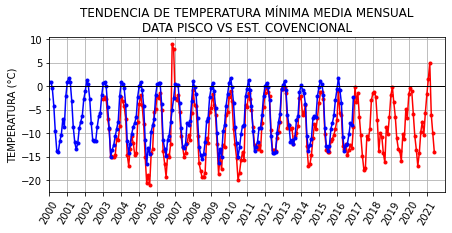

In [ ]:
ver_pisco_vs_estconv('Tmin')

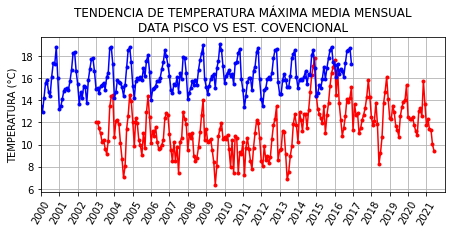

In [ ]:
ver_pisco_vs_estconv('Tmax')

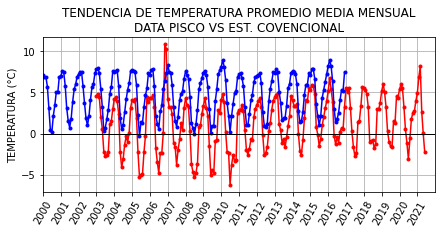

In [ ]:
ver_pisco_vs_estconv('Tmedia')

In [ ]:
vizc_est_anual = vizc_est_mensual.set_index('FECHA').resample(rule='A').mean().reset_index()
vizc_est_anual

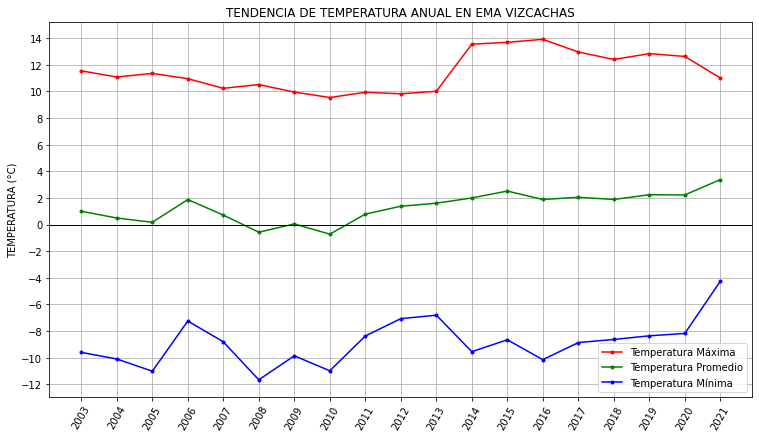

In [ ]:
# @markdown Plot de 32cm x 17.5cm
plt.figure(figsize=(32*cm, 17.5*cm))
plt.plot(vizc_est_anual.FECHA, vizc_est_anual.Tmax, 'r.-', label = 'Temperatura Máxima')
plt.plot(vizc_est_anual.FECHA, vizc_est_anual.Tmedia, 'g.-', label = 'Temperatura Promedio')
plt.plot(vizc_est_anual.FECHA, vizc_est_anual.Tmin, 'b.-', label = 'Temperatura Mínima')
# plt.plot(vizc_pisco.FECHA, vizc_pisco.Tmax, 'k-', label = 'T_max_Pisco')

titulo = 'TENDENCIA DE TEMPERATURA ANUAL EN EMA VIZCACHAS'

plt.title(titulo)
plt.ylabel(ylabel)
plt.yticks([i for i in range(-12,15,2)])
plt.xticks([pd.Timestamp(str(i)) for i in range(2003,2022,1)], rotation = 60)
from matplotlib import dates as mpl_dates
plt.gca().xaxis.set_major_formatter(mpl_dates.DateFormatter('%Y'))

plt.axhline(0, color = 'black', linewidth = '1') # Resaltar el 0

# Ubicar la leyenda en la parte inferior
# plt.xlim(pd.Timestamp('2000'),pd.Timestamp('2021'))
plt.legend(loc=4)
plt.grid()
plt.savefig('Temperatura_anual', bbox_inches='tight');

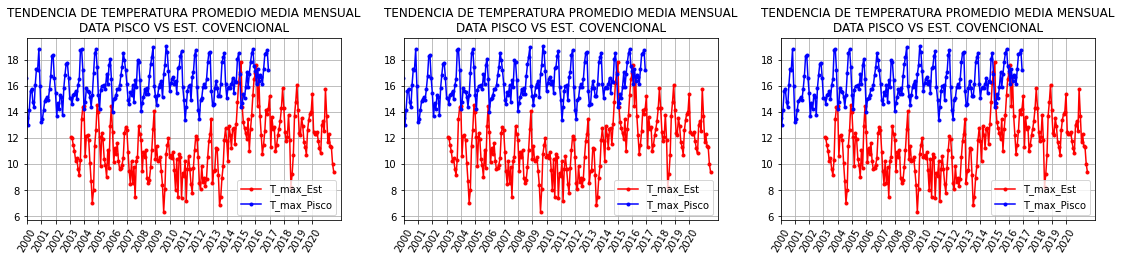

In [ ]:
# @markdown Plot horizontal
plt.figure(figsize=(16.2*cm*3, 8.5*cm))
for i in range(131,134):
  plt.subplot(i)
  plt.plot(vizc_est_mensual.FECHA, vizc_est_mensual.Tmax, 'r.-', label = 'T_max_Est')
  plt.plot(vizc_pisco.FECHA, vizc_pisco.Tmax, 'b.-', label = 'T_max_Pisco')
  plt.xticks(xticks, rotation = 60)#, ha='right')
  plt.title(titulo)

  from matplotlib import dates as mpl_dates
  plt.gca().xaxis.set_major_formatter(mpl_dates.DateFormatter('%Y'))
  
  plt.xlim(pd.Timestamp('2000'),pd.Timestamp('2022'))
  plt.legend()
  plt.grid();

## Tendencias Trimestrales: Temperatura Máxima y Mínima

Períodos para ordenar fechas:
- **Tendencia de temperatura maxima media mensual**: de enero a diciembre. 
- **Tendencia de Periodo Hidrológico**: de setiembre a agosto. 
- **Tendencia de Avenidas**: comprende de diciembre a abril y son los meses de mayoTendencia de res acumulados de precipitación. 
- **Tendencia de Estiaje**: comprende de mayo a noviembre y son los meses de escasos/menores acumulados de precipitación.

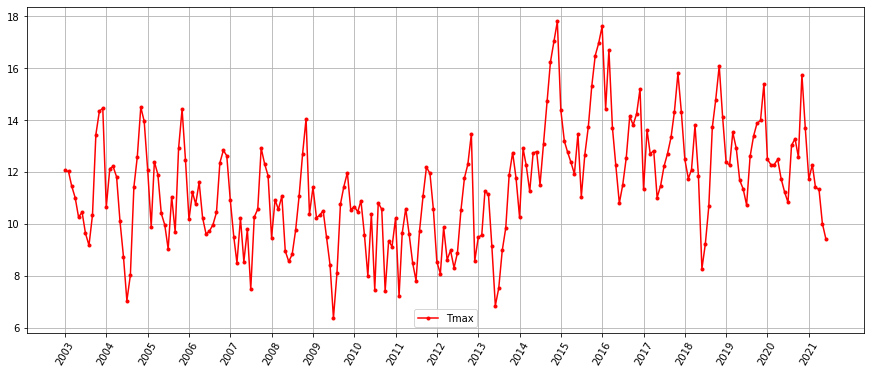

In [10]:
ver_grafica(vizc_est_mensual, None, None, None, 'Tmax')

Períodos para ordenar fechas:
- **Tendencia de temperatura minima media mensual**: de enero a diciembre. 
- **Tendencia de Periodo Hidrológico**: de setiembre a agosto. 
- **Tendencia de Avenidas**: comprende de diciembre a abril y son los meses de mayoTendencia de res acumulados de precipitación. 
- **Tendencia de Estiaje**: comprende de mayo a noviembre y son los meses de escasos/menores acumulados de precipitación.

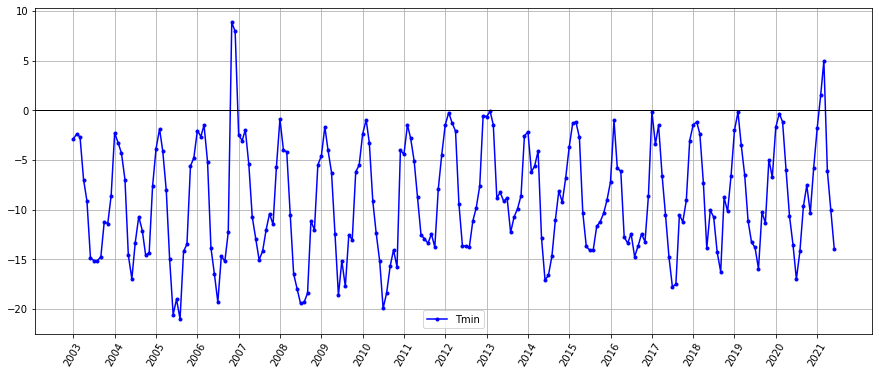

In [ ]:
ver_grafica(vizc_est_mensual, None, None, None, 'Tmin')

### Organizando por trimestres

Periodos trimestrales:
- Trimestre Diciembre - Enero - Febrero (DEF)
- Trimestre Marzo - Abril - Mayo (MAM)
- Trimestre Junio - Julio - Agosto (JJA)
- Trimestre Setiembre - Octubre - Noviembre (SON)


In [ ]:
df = vizc_est_mensual.copy()

In [13]:
df['Año'] = pd.DatetimeIndex(df.FECHA).year
df['Mes'] = pd.DatetimeIndex(df.FECHA).month
# df['Dia'] = pd.DatetimeIndex(df.FECHA).day
df.head()

,FECHA,Tmax,Tmin,Tmedia,Año,Mes,Dia
0,2003-01-01,12.054839,-2.845161,4.604839,2003,1,1
1,2003-02-01,12.017857,-2.382143,4.817857,2003,2,1
2,2003-03-01,11.458065,-2.683871,4.387097,2003,3,1
3,2003-04-01,11.006667,-6.963333,2.021667,2003,4,1
4,2003-05-01,10.254839,-9.119355,0.567742,2003,5,1


In [16]:
# @markdown Función para generar graficas por trimestres

# Generando una funcion final
def filtrarTrimestresDEF(year, trimestre=['DEF', 'MAM', 'JJA', 'SON']):
  if trimestre == 'DEF':
    return (
      pd.concat([
                 df.loc[(df['Mes']==12) & (df['Año']==year)],
                 df.loc[(df['Mes']==1) & (df['Año']==year+1)],
                 df.loc[(df['Mes']==2) & (df['Año']==year+1)]
                 ], ignore_index=True)
    )
  if trimestre == 'MAM':
    return (
      pd.concat([
                 df.loc[(df['Mes']==3) & (df['Año']==year)],
                 df.loc[(df['Mes']==4) & (df['Año']==year)],
                 df.loc[(df['Mes']==5) & (df['Año']==year)]
                 ], ignore_index=True)
    )
  if trimestre == 'JJA':
    return (
      pd.concat([
                 df.loc[(df['Mes']==6) & (df['Año']==year)],
                 df.loc[(df['Mes']==7) & (df['Año']==year)],
                 df.loc[(df['Mes']==8) & (df['Año']==year)]
                 ], ignore_index=True)
    )
  if trimestre == 'SON':
    return (
      pd.concat([
                 df.loc[(df['Mes']==9) & (df['Año']==year)],
                 df.loc[(df['Mes']==10) & (df['Año']==year)],
                 df.loc[(df['Mes']==11) & (df['Año']==year)]
                 ], ignore_index=True)
    )
  else:
    return(
        print('hola')
    )

In [ ]:
# filtrarTrimestresDEF(year, trimestre=['DEF', 'MAM', 'JJA', 'SON'])

In [275]:
# Agregando meses de Enero y Febrero al histórico de la temporada DEF
historico_DEF_0 = df.iloc[0:2]
historico_DEF_1 = pd.concat([filtrarTrimestresDEF(i,'DEF') for i in range(2003, 2022)]).reset_index(drop=True)

# Armando históricos
historico_DEF = pd.concat([historico_DEF_0, historico_DEF_1]).reset_index(drop=True)
historico_MAM = pd.concat([filtrarTrimestresDEF(i,'MAM') for i in range(2003, 2022)]).reset_index(drop=True)
historico_JJA = pd.concat([filtrarTrimestresDEF(i,'JJA') for i in range(2003, 2022)]).reset_index(drop=True)
historico_SON = pd.concat([filtrarTrimestresDEF(i,'SON') for i in range(2003, 2022)]).reset_index(drop=True)

In [235]:
# @markdown Función `ver_tendencia_temp(variable, trimestre)`
from ipywidgets import interact, fixed

def ver_tendencia_temp(variable, trimestre):
  '''
  variable = 'Tmax', 'Tmin'
  trimestre = 'DEF', 'MAM', 'JJA', 'SON'
  '''
  nomb_estacion = 'VIZCACHAS'

  # lista = ['def','mam','jja','son']

  if 'DEF' in trimestre:
    df = historico_DEF
    titulo ='Trimestre Diciembre - Enero - Febrero'.upper() + f'\nESTACION: {nomb_estacion}'
  if 'MAM' in trimestre:
    df = historico_MAM
    titulo ='Trimestre Marzo - Abril - Mayo'.upper() + f'\nESTACION: {nomb_estacion}'
  if 'JJA' in trimestre:
    df = historico_JJA
    titulo ='Trimestre Junio - Julio - Agosto'.upper() + f'\nESTACION: {nomb_estacion}'
  if 'SON' in trimestre:
    df = historico_SON
    titulo ='Trimestre Setiembre - Octubre - Noviembre'.upper() + f'\nESTACION: {nomb_estacion}'

  cm = 1/2.54 # convertir a cm
  # modificar las medidas
  plt.figure(1, figsize=(24.1*cm, 17.45*cm)) 

  plt.plot(df.FECHA, df[variable], 'b.-', label = str(variable))

  if variable == 'Tmin':
    # Resaltar el 0
    plt.axhline(0, color = 'black', linewidth = '1') 
  
  plt.title(titulo)
  # plt.xlabel(xlabel)
  plt.ylabel(ylabel = 'TEMPERATURA (°C)')

  # Establecer eje X con años de acuerdo al df
  plt.xticks(
      [pd.Timestamp(str(i)) for i in range(
          df.FECHA[0].year,
          df.FECHA[df.shape[0]-1].year+2
          )
      ], rotation=60
    )

  # Darle formato a las fechas
  from matplotlib import dates as mpl_dates
  date_format = mpl_dates.DateFormatter('%Y')
  plt.gca().xaxis.set_major_formatter(date_format) 

  # Ubicar la leyenda en la parte inferior
  plt.legend()
  plt.gca().legend(loc='best', 
                    # bbox_to_anchor=(0.5, 0.001),
                    ncol=1)
  plt.grid();

interact(ver_tendencia_temp, trimestre=['DEF','MAM','JJA','SON'], variable=['Tmax','Tmin']);

interactive(children=(Dropdown(description='variable', options=('Tmax', 'Tmin'), value='Tmax'), Dropdown(descr…

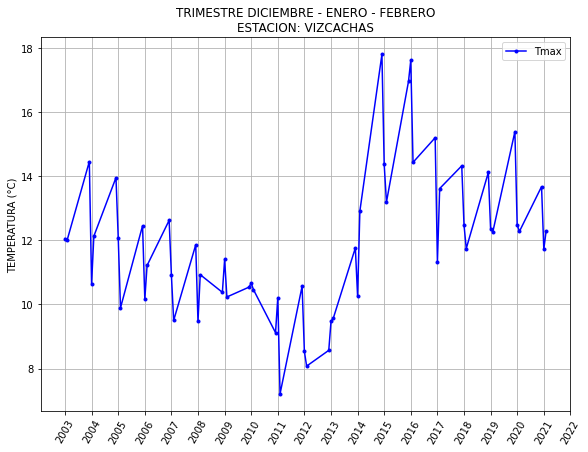

In [242]:
ver_tendencia_temp('Tmax', 'DEF')

### Tendencia

In [ ]:
import scipy.stats as sp
import numpy as np

- [scipy.stats.linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

-  ($r^2$) [Coefficient of determination](https://www.scribbr.com/statistics/correlation-coefficient/)
- [Linear regression of time series data with python pandas library](https://mohammadimranhasan.com/linear-regression-of-time-series-data-with-pandas-library-in-python/)

In [ ]:
# Agregando meses de Enero y Febrero al histórico de la temporada DEF
historico_DEF_0 = df.iloc[0:2]
historico_DEF_1 = pd.concat([filtrarTrimestresDEF(i,'DEF') for i in range(2003, 2022)]).reset_index(drop=True)

# Armando históricos
historico_DEF = pd.concat([historico_DEF_0, historico_DEF_1]).reset_index(drop=True)
historico_MAM = pd.concat([filtrarTrimestresDEF(i,'MAM') for i in range(2003, 2022)]).reset_index(drop=True)
historico_JJA = pd.concat([filtrarTrimestresDEF(i,'JJA') for i in range(2003, 2022)]).reset_index(drop=True)
historico_SON = pd.concat([filtrarTrimestresDEF(i,'SON') for i in range(2003, 2022)]).reset_index(drop=True)

historico_DEF.set_index('FECHA', inplace=True)
historico_MAM.set_index('FECHA', inplace=True)
historico_JJA.set_index('FECHA', inplace=True)
historico_SON.set_index('FECHA', inplace=True)

In [ ]:
# @markdown Función; `tendencias(df, variable)`
def tendencias(df, variable):
  y=np.array(df[variable].values, dtype=float)
  x=np.array(pd.to_datetime(df[variable].index.values), dtype=float)

  slope, intercept, r_value, p_value, std_err = sp.linregress(x,y)

  xf = np.linspace(min(x), max(x), 100)
  xf1 = xf.copy()
  xf1 = pd.to_datetime(xf1)
  yf = (slope*xf) + intercept

  print(f'slope= {slope}')
  print(f'intercept= {intercept}')
  print(f'r= {r_value:.5f}')
  print(f'p= {p_value:.5f}')
  print(f's= {std_err}')

  df = df.reset_index()

  plt.plot(xf1, yf, 'r--', lw=2, label='Regresión Lineal')
  plt.plot(df['FECHA'], df[variable], 'b.-')

  plt.xticks(
    [pd.Timestamp(str(i)) for i in range(
        df.FECHA[0].year,
        df.FECHA[df.shape[0]-1].year+2
        )
    ], rotation=60
  )

  # Darle formato a las fechas
  from matplotlib import dates as mpl_dates
  date_format = mpl_dates.DateFormatter('%Y')
  plt.gca().xaxis.set_major_formatter(date_format) 

  plt.ylabel('Temperatura')
  plt.grid()
  plt.legend();

slope= 3.779350508297145e-18
intercept= 6.138739341113132
r= 0.41713
p= 0.00125
s= 1.1103357349810988e-18


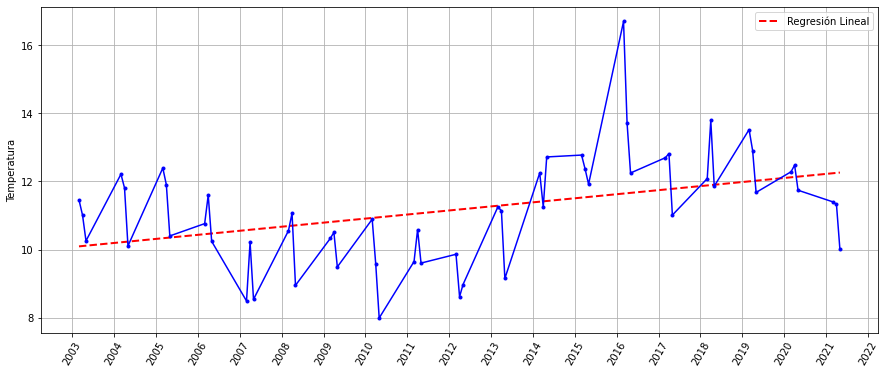

In [339]:
tendencias(historico_MAM, 'Tmax')

slope= 3.4618592227421435e-18
intercept= -15.648727518370642
r= 0.14795
p= 0.28568
s= 3.209165627907257e-18


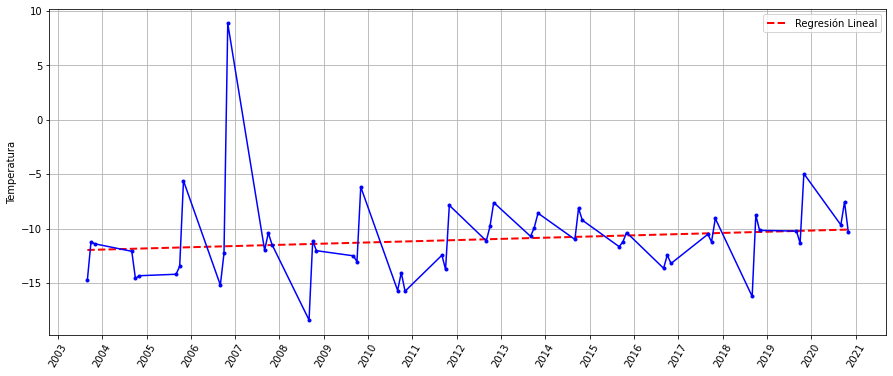

In [342]:
# tendencias(historico_MAM, 'Tmax')
# tendencias(historico_MAM, 'Tmax')
# tendencias(historico_JJA, 'Tmax')
tendencias(historico_SON, 'Tmin')

### Suavizado de líneas

# Recursos usados

QQPLOT en Python: https://github.com/ecabestadistica/curso-series-temporales/blob/master/1.%20Introduccion%20a%20las%20series%20temporales/Python/1_Python_Introducci%C3%B3n_a_las_series_temporales.ipynb
```
scipy.stats.probplot(df_comp.spx, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()
```

1. https://towardsdatascience.com/how-to-use-loc-and-iloc-for-selecting-data-in-pandas-bd09cb4c3d79
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
3. https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
4. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html : Ojo con resamplear 'M' y 'MS' al igual que 'A' y 'AS'
  - https://codingandfun.com/resampling-time-series-with-pandas-from-daily-to-monthly-nasdaq-prices/
5. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html
- [Matplotlib Tutorial (Part 8): Plotting Time Series Data](https://www.youtube.com/watch?v=_LWjaAiKaf8): Ha servido para modificar el formato de las fechas:
```
from matplotlib import dates as mpl_dates
  plt.gca().xaxis.set_major_formatter(mpl_dates.DateFormatter('%Y'))
```

- https://matplotlib.org/stable/api/dates_api.html#matplotlib.dates.MonthLocator : Algún día entenderé esta vaina
- https://stackoverflow.com/questions/16032389/pad-inches-0-and-bbox-inches-tight-makes-the-plot-smaller-than-declared-figsiz : Remover espacio en blanco de una imagen cuando le das `plt.savefig`

- [pandas.DataFrame.resample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)

In [ ]:
# Prueba
# vizc_est_anual = vizc_est.set_index('FECHA').resample(rule='3MS').mean()
# vizc_est_anual = vizc_est_anual.reset_index()
# vizc_est_anual.FECHA = pd.to_datetime(vizc_est_anual.FECHA, format='%d/%m/%Y')
# display(vizc_est_anual.head())

# # ver_grafica(vizc_est_anual, titulo, xlabel, ylabel)

,FECHA,Tmax,Tmin,Tmedia
0,2003-01-01,11.837778,-2.645556,4.596111
1,2003-04-01,10.567033,-10.293407,0.136813
2,2003-07-01,9.706522,-14.996703,-2.506522
3,2003-10-01,14.077174,-10.385870,1.845652
4,2004-01-01,11.652747,-3.284615,4.184066


##### Código eliminado

In [ ]:
%ls

Pisco_pp.csv    Pisco_Tmedia.csv  Temperatura_Vizcachas.csv
Pisco_Tmax.csv  Pisco_Tmin.csv


In [ ]:
import glob
lista_archivos = glob.glob('Pisco_T**.csv')
lista_archivos

['Pisco_Tmax.csv', 'Pisco_Tmedia.csv', 'Pisco_Tmin.csv']

In [ ]:
Pisco_Tmax = pd.read_csv(lista_archivos[0]).loc[:,['FECHA','VIZCACHAS VW-1']]
Pisco_Tmedia = pd.read_csv(lista_archivos[1]).loc[:,'VIZCACHAS VW-1']
Pisco_Tmin = pd.read_csv(lista_archivos[2]).loc[:,'VIZCACHAS VW-1']

vizc_pisco = pd.concat([Pisco_Tmax, Pisco_Tmin, Pisco_Tmedia], axis=1)
vizc_pisco.columns = ['FECHA', 'Tmax', 'Tmin', 'Tmedia']
vizc_pisco.FECHA = pd.to_datetime(vizc_pisco.FECHA, format='%d/%m/%Y')